In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "Students Social Media Addiction.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "aminasalamt/social-media-dataset-2025",
  file_path,
  # Provide any additional arguments like 
  # sql_query or pandas_kwargs. See the 
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head())

/home/zephyr/workspace/DA_toolbox/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/tmp/ipykernel_18358/3507842688.py:10: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


First 5 records:    Student_ID  Age  Gender Academic_Level     Country  Avg_Daily_Usage_Hours  \
0           1   19  Female  Undergraduate  Bangladesh                    5.2   
1           2   22    Male       Graduate       India                    2.1   
2           3   20  Female  Undergraduate         USA                    6.0   
3           4   18    Male    High School          UK                    3.0   
4           5   21    Male       Graduate      Canada                    4.5   

  Most_Used_Platform Affects_Academic_Performance  Sleep_Hours_Per_Night  \
0          Instagram                          Yes                    6.5   
1            Twitter                           No                    7.5   
2             TikTok                          Yes                    5.0   
3            YouTube                           No                    7.0   
4           Facebook                          Yes                    6.0   

   Mental_Health_Score Relationship_Status  C

Assumptions

Since this notebook is just to practice statistical testing, we'll assume the following : 

- dataset is a representative random sample of our population of interest
- observations are independent

In [5]:
df.sample(5)

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
187,188,22,Male,Graduate,Pakistan,4.3,Instagram,Yes,7.1,5,In Relationship,3,7
204,205,19,Female,Undergraduate,Nepal,6.2,TikTok,Yes,4.6,6,Single,4,8
420,421,19,Female,Undergraduate,Spain,4.2,Instagram,Yes,7.7,6,Single,3,7
27,28,20,Female,Undergraduate,Singapore,4.4,TikTok,Yes,5.9,6,In Relationship,3,7
142,143,19,Male,Undergraduate,Nepal,3.9,TikTok,No,8.1,7,Single,2,5


1. Is there any difference in social media usage between Male and Female?

In [6]:
df.isnull().sum()

Student_ID                      0
Age                             0
Gender                          0
Academic_Level                  0
Country                         0
Avg_Daily_Usage_Hours           0
Most_Used_Platform              0
Affects_Academic_Performance    0
Sleep_Hours_Per_Night           0
Mental_Health_Score             0
Relationship_Status             0
Conflicts_Over_Social_Media     0
Addicted_Score                  0
dtype: int64

In [7]:
# num of countries
df['Country'].nunique()

110

In [8]:
# proportions
df['Gender'].value_counts()

Gender
Female    353
Male      352
Name: count, dtype: int64

## Difference in Avg_Daily_Usage_Hours between Male & Female

In [9]:
male_usage_hours = df[df['Gender']=="Male"]["Avg_Daily_Usage_Hours"]
female_usage_hours = df[df['Gender']=="Female"]["Avg_Daily_Usage_Hours"]

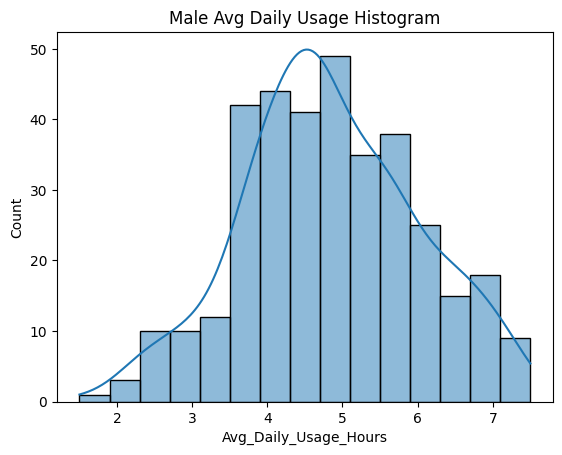

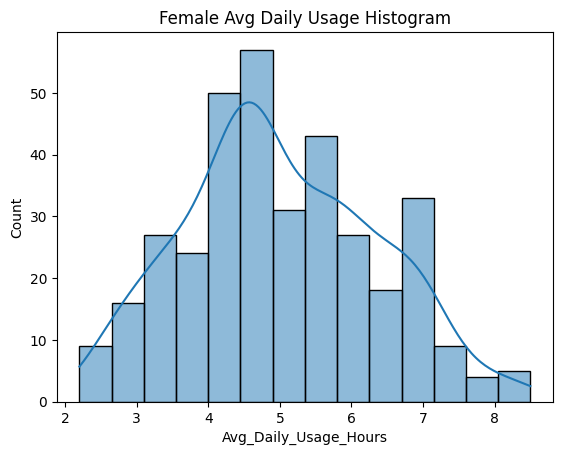

In [10]:
sns.histplot(male_usage_hours, kde=True)
plt.title("Male Avg Daily Usage Histogram")
plt.show()

sns.histplot(female_usage_hours, kde=True)
plt.title("Female Avg Daily Usage Histogram")
plt.show()

### Find Confidence Interval

In [30]:
# --- First, get sample statistics ---
# sample means
u_male = male_usage_hours.mean()   
u_female = female_usage_hours.mean()   
# sample standard deviations
std_male = male_usage_hours.std(ddof=1)   
std_female = female_usage_hours.std(ddof=1)   

print(f"Sample Means -> Male: {u_male:.2f}, Female: {u_female:.2f}")
print(f"Sample Std Devs -> Male: {std_male:.2f}, Female: {std_female:.2f}")


# --- Define confidence level and find associated z-score ---
# We'll define confidence level as 95%
# and find the associated z-score for a 95% confidence level
from scipy.stats import norm
confidence_level = 0.95
alpha = 1 - confidence_level
z_score = norm.ppf(1 - alpha / 2)  # z-score corresponding to 95% confidence
print(f"Confidence Level: {confidence_level*100:.0f}%, Z-Score: {z_score:.4f}")


# --- Find Standard Error (SE = S / sqrt(n)) ---
# This measures variability of sample statistics (sample mean in this case)
# Shows how much the sample mean is likely to differ from the actual population mean
male_std_err = std_male / np.sqrt(len(male_usage_hours))
female_std_err = std_female / np.sqrt(len(female_usage_hours))
print(f"Standard Errors -> Male: {male_std_err:.3f}, Female: {female_std_err:.3f}")


# --- Margin of error (ME = z-score * SE) ---
male_margin_of_err = z_score * male_std_err
female_margin_of_err = z_score * female_std_err
print(f"Margins of Error -> Male: {male_margin_of_err:.3f}, Female: {female_margin_of_err:.3f}")


# --- Calculate Confidence Intervals ---
male_CI_lower_bound = u_male - male_margin_of_err
male_CI_upper_bound = u_male + male_margin_of_err
female_CI_lower_bound = u_female - female_margin_of_err
female_CI_upper_bound = u_female + female_margin_of_err

print(f"Male 95% CI: ({male_CI_lower_bound:.2f}, {male_CI_upper_bound:.2f})")
print(f"Female 95% CI: ({female_CI_lower_bound:.2f}, {female_CI_upper_bound:.2f})")


Sample Means -> Male: 4.83, Female: 5.01
Sample Std Devs -> Male: 1.17, Female: 1.33
Confidence Level: 95%, Z-Score: 1.9600
Standard Errors -> Male: 0.062, Female: 0.071
Margins of Error -> Male: 0.122, Female: 0.139
Male 95% CI: (4.70, 4.95)
Female 95% CI: (4.87, 5.15)
